<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceApplicationsInComputerVision/blob/main/Class12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Solution Development**
The process of developing data science solutions involves crucial steps, beginning with a clear definition of the problem and objectives, followed by data collection and preparation. Data processing is essential to remove inconsistencies and transform categorical variables into numerical ones, using tools such as Pandas and NumPy. After preparation, the data is divided into training and testing sets to ensure the model is evaluated correctly, adjusting hyperparameters and choosing the appropriate algorithm, such as Random Forests or neural networks, depending on the project's needs. The final phase is solution implementation, where the model is inserted into an automated pipeline for real-time predictions. Python facilitates this process with libraries such as Flask and Docker, enabling model scalability and continuous performance monitoring. The success of a data science solution depends on an effective combination of accurate modeling, adequate data cleaning, and solid implementation.

In [1]:
# Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Collecting and preparing the data:
# Using the Titalic dataset, which is publicly available:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Displaying the first rows of the dataset:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Data cleaning and preparation:
# Removing irrelavant columns and filling in missing values:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna (data['Age'].mean(), inplace=True)
data['Embarked'].fillna (data['Embarked' ].mode()[0], inplace=True)

# Converting categorical values into dummy variables:
data = pd.get_dummies (data, drop_first=True)


/tmp/ipython-input-2809691800.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna (data['Age'].mean(), inplace=True)
/tmp/ipython-input-2809691800.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [4]:
# Splitting the data into training and test:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Training the model with Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Evaluating the model:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score (y_test, y_pred)}')
print(classification_report (y_test, y_pred))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



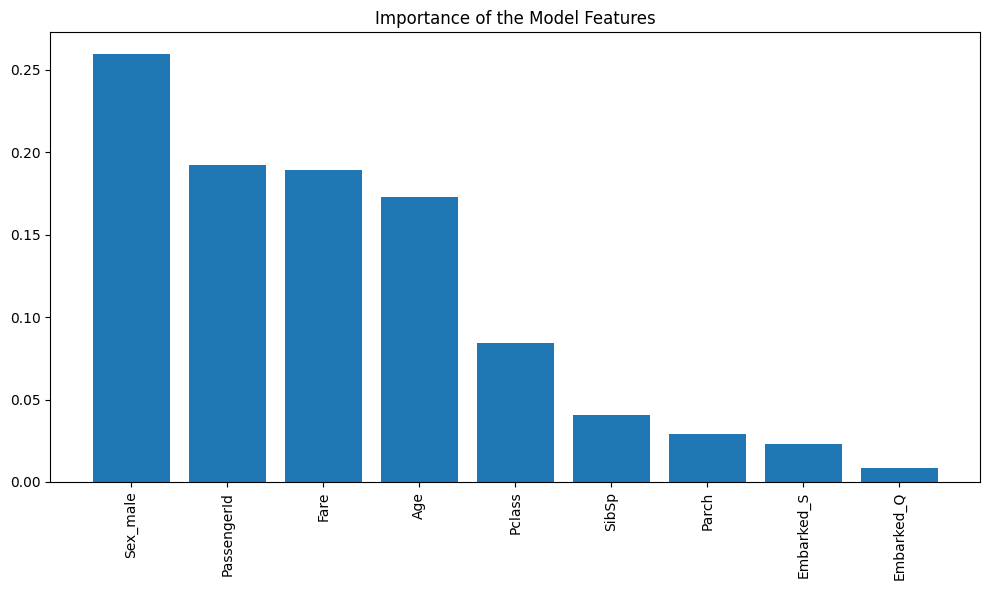

In [8]:
# Displaying the importance of the model features:
importances = model.feature_importances_
indexes = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Importance of the Model Features')
plt.bar(range(X_train.shape[1]), importances[indexes], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indexes], rotation=90)
plt.tight_layout()
plt.show()